<a href="https://colab.research.google.com/github/Archi7799/Computer-Vision-Vehicle-classification/blob/main/Rise11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load data
data = pd.read_csv('train.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocess the data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back to form a sentence
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to the 'X' column
data['X_processed'] = data['text'].apply(preprocess_text)

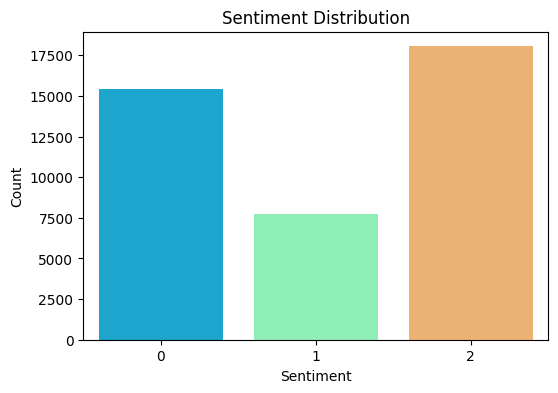

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Y', data=data, palette='rainbow')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split the data into features (X) and target variable (Y)
X = data['X_processed']  # Preprocessed social media posts
Y = data['Y']  # Sentiment

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# Choosing a pre-trained model (Support Vector Machine in this case)
svm_model = SVC(kernel='linear')  # You can explore other models and their hyperparameters

# Training the model
svm_model.fit(X_train, Y_train)

# Testing the model
Y_pred = svm_model.predict(X_test)

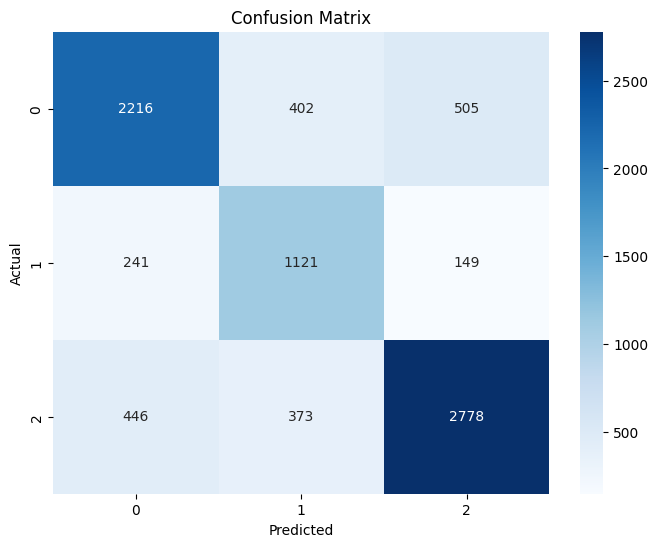

0.7429230956141416


In [ ]:
# Plotting confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Accuracy
print(accuracy_score(Y_test, Y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [ ]:
# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)
nb_classifier = MultinomialNB()
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train classifiers
rf_classifier.fit(X_train, Y_train)
log_reg_classifier.fit(X_train, Y_train)
nb_classifier.fit(X_train, Y_train)
nn_classifier.fit(X_train, Y_train)

# Ensemble: Voting Classifier
voting_classifier = VotingClassifier([('rf', rf_classifier),
                                      ('lr', log_reg_classifier),
                                      ('nb', nb_classifier),
                                      ('nn', nn_classifier)])

voting_classifier.fit(X_train, Y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)
log_reg_predictions = log_reg_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)
nn_predictions = nn_classifier.predict(X_test)
voting_predictions = voting_classifier.predict(X_test)

# Evaluate performance
classifiers = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Neural Network', 'Voting Classifier']
predictions = [rf_predictions, log_reg_predictions, nb_predictions, nn_predictions, voting_predictions]

for clf, pred in zip(classifiers, predictions):
    acc = accuracy_score(Y_test, pred)
    print(f"{clf} Accuracy: {acc:.4f}")

# Calculate and print confusion matrix for Voting Classifier
voting_conf_matrix = confusion_matrix(Y_test, voting_predictions)
print("\nVoting Classifier Confusion Matrix:")
print(voting_conf_matrix)

Random Forest Accuracy: 0.7133
Logistic Regression Accuracy: 0.7356
Naive Bayes Accuracy: 0.6524
Neural Network Accuracy: 0.7153
Voting Classifier Accuracy: 0.7388

Voting Classifier Confusion Matrix:
[[2377  257  489]
 [ 378  929  204]
 [ 546  276 2775]]
